In [81]:
# Imports
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
from scipy.stats import zscore
import graphviz
import os

import os

# Set the default folder path
default_folder = 'C:/Users/ashly/OneDrive/Documents/Education Material/FundamentalsDS/Project/DS-Model'

# Change the working directory
os.chdir(default_folder)
print(f'The default directory for this notebook is: {os.getcwd()}')

The default directory for this notebook is: C:\Users\ashly\OneDrive\Documents\Education Material\FundamentalsDS\Project\DS-Model


In [81]:
os.system('dot -V')

1

The Six Figure Salary Predictive Model based on School Choice (Classification)
Target Feature: Six Figure Salary by mid-career (True or False)
Descriptive features: School Name, Stem Percent, Total_Cost of School, Rank of School, Diversity Index 

In [64]:
# Begin Making Decision Tree --> Cannot run this until preprocessing is complete
def visualizeData(file_path):
    df = pd.read_csv(file_path, sep=',')
    
    sns.set(style='whitegrid', context='notebook')
    cols = ['name', 'stem_percent', 'total_cost', 'rank', 
            'diversity_percent']
    sns.pairplot(df, hue='makes_six_figures', height=2.0)
    plt.savefig('visualizations/seaborn_visual.png')
    plt.show()
    


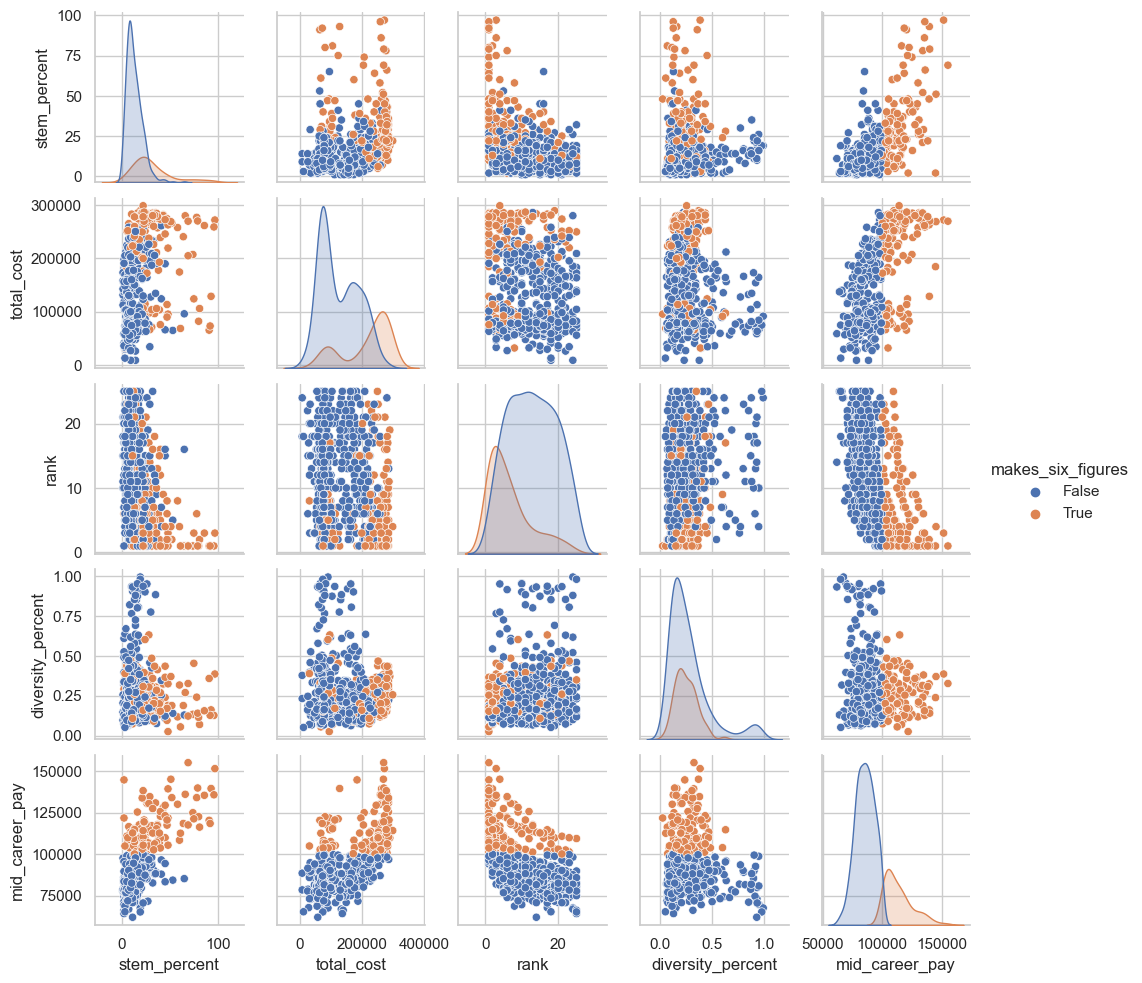

In [65]:
file_path = 'data_processed/modelling_data.csv'
visualizeData(file_path)

In [91]:
# Split data into training and testing data sets
def splitData(file_path):
    df = pd.read_csv(file_path, sep=',')
    class_mapping = {label:idx for idx,label in enumerate(np.unique(df['makes_six_figures']))}
    df['makes_six_figures'] = df['makes_six_figures'].map(class_mapping)
    x, y = df.iloc[:, 1:5].values, df['makes_six_figures'].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
    df1 = pd.DataFrame(data=x_train, columns=df.columns[1:5])
    print(df1.head())
    print(df1.shape)
    df2 = pd.DataFrame(data=y_train, columns=['makes_six_figures'])
    print(df2.head())
    print(df2.shape)
    df3 = pd.DataFrame(data=x_test, columns=df.columns[1:5])
    print(df3.head())
    print(df3.shape)
    df4 = pd.DataFrame(data=y_test, columns=['makes_six_figures'])
    print(df4.head())
    print(df4.shape)
    
    # train first classifier
    dct = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
    dct = dct.fit(x_train, y_train)
# Build Tree
    # export_graphviz(dct, out_file='tree.dot')
    
    # Reading the 'tree.dot' file and rendering it
    # with open('tree.dot') as file:
    #     dot_graph = file.read()
    #     graphviz.Source(dot_graph)
    print('entrophy information gain')
    results_entrophy = pd.DataFrame(columns=['Level Limit', 'Score for Training', 'Score for Testing'])
    for tree_depth in range(1,11):
        # train first classifier
        dct = DecisionTreeClassifier(criterion='entropy', max_depth=tree_depth, random_state=0)
        dct = dct.fit(x_train, y_train)
        dct.predict(x_test)
        score_train = dct.score(x_train, y_train)
        score_test = dct.score(x_test, y_test)
        results_entrophy.loc[tree_depth] = [tree_depth, score_train, score_test]
    
    print(results_entrophy.head(11))
    results_entrophy.pop('Level Limit')
    ax = results_entrophy.plot()
    
    print('gini impurity')
    results_gini = pd.DataFrame(columns=['Level Limit', 'Score for Training', 'Score for Testing'])
    for tree_depth in range(1,11):
        # train first classifier
        dct = DecisionTreeClassifier(criterion='gini', max_depth=tree_depth, random_state=0)
        dct = dct.fit(x_train, y_train)
        dct.predict(x_test)
        score_train = dct.score(x_train, y_train)
        score_test = dct.score(x_test, y_test)
        results_gini.loc[tree_depth] = [tree_depth, score_train, score_test]
    
    print(results_gini.head(11))
    results_gini.pop('Level Limit')
    ax = results_gini.plot()

   stem_percent  total_cost  rank  diversity_percent
0          19.0     78996.0  14.0           0.162539
1           6.0    164560.0  19.0           0.061637
2           6.0    102520.0   6.0           0.088090
3          16.0    104128.0  15.0           0.874678
4           2.0    153752.0  20.0           0.343217
(382, 4)
   makes_six_figures
0                  0
1                  0
2                  0
3                  0
4                  0
(382, 1)
   stem_percent  total_cost  rank  diversity_percent
0           6.0     95252.0  18.0           0.277889
1          48.0    262480.0   2.0           0.324555
2          12.0    205200.0   6.0           0.356490
3           2.0    155800.0  15.0           0.490131
4           2.0    197320.0   7.0           0.072281
(189, 4)
   makes_six_figures
0                  0
1                  1
2                  0
3                  0
4                  0
(189, 1)
entrophy information gain
    Level Limit  Score for Training  Score for Tes

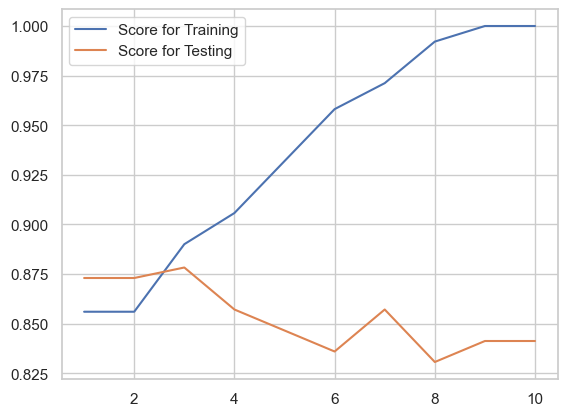

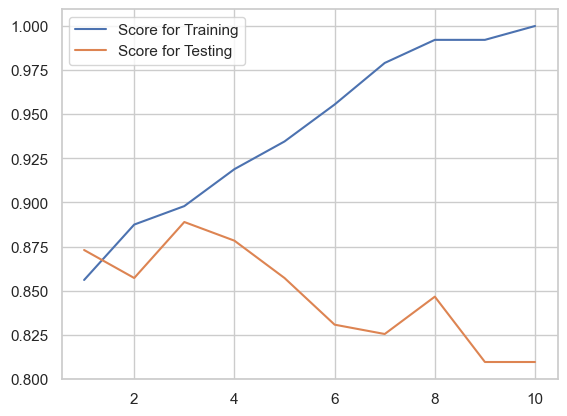

In [92]:
# function execution
file_path = 'data_processed/modelling_data.csv'
splitData(file_path)

In [94]:
# Function Creation - Applying Bootstrapping before train_test split
def bootstrapTesting(file_path):
    df = pd.read_csv(file_path, sep=',')
    class_mapping = {label:idx for idx,label in enumerate(np.unique(df['makes_six_figures']))}
    df['makes_six_figures'] = df['makes_six_figures'].map(class_mapping)
    x, y = df.iloc[:, 1:5].values, df['makes_six_figures'].values
    n_trees = 5 # number of decision trees
    name_of_tree = 'tree'
    count = 1
    decision_trees = [] # create separate images of trees
    bootstrap_data = []
    # create ensembles 
    random_forest = RandomForestClassifier(n_estimators=n_trees, criterion='entropy', max_depth=8, random_state=0)
    
    for i in range(n_trees):
        # create a bootstrap sample
        x_boot, y_boot = resample(x, y, replace=True, random_state=0)
        # create training and testing sets for each bootstrap sample
        x_train_boot, x_test_boot, y_train_boot, y_test_boot = train_test_split(x_boot, y_boot, test_size=0.33, random_state=i)
            
        # store the data in a list
        bootstrap_data.append({
            'x_train': x_train_boot,
            'x_test': x_test_boot, 
            'y_train': y_train_boot, 
            'y_test': y_test_boot 
        })
        
    for data in bootstrap_data:
        print(f'--------------------Tree {count}--------------------')
        x_train_boot, y_train_boot = data['x_train'], data['y_train']
        dct = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)
        dct.fit(x_train_boot, y_train_boot)
        decision_trees.append(dct)
        
        # Build Tree
        # export_graphviz(dct, out_file=f'{name_of_tree}{count}.dot', feature_names=df.columns[1:5])
        # Reading the 'tree.dot' file and rendering it
        # with open(f'{name_of_tree}{count}.dot') as file:
        #     dot_graph = file.read()
        #     graphviz.Source(dot_graph)
            
        # Find Feature Importance
        feature_importance = dct.feature_importances_
        print('Feature Importance: ', feature_importance)
        
        # collect assessment stats of each tree
        y_pred = dct.predict(data['x_test'])
        accuracy = accuracy_score(data['y_test'], y_pred)
        print('Accuracy for Tree {}: {:.2f}'.format(count, accuracy))
        
        # Random Forest Model 
        random_forest.fit(x_train_boot, y_train_boot)
        forest_feature_importance = random_forest.feature_importances_
        print('Forest Feature Importance: ', forest_feature_importance)
        visualizeRandomForest(forest_feature_importance, count)
        
        # collect assessment stats
        y_pred = random_forest.predict(data['x_test'])
        accuracy = accuracy_score(data['y_test'], y_pred)
        print('Forest Accuracy for Tree {}: {:.2f}'.format(count, accuracy))
        
        # Plot ROC for RandomForest
        # Make predictions on the test set
        y_pred_prob_forest = random_forest.predict_proba(data['x_test'])[:, 1]

        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(data['y_test'], y_pred_prob_forest)
        plotROC_Curve(y_pred_prob_forest, fpr, tpr, count)

        # Plot Confusion Matrix
        plotConfusionMatrix(data['y_test'], y_pred, count)
        
        df1 = pd.DataFrame(data=x_train_boot, columns=df.columns[1:5])
        print(df1.head())
        print(df1.shape)
        df2 = pd.DataFrame(data=y_train_boot, columns=['makes_six_figures'])
        print(df2.head())
        print(df2.shape)
        df3 = pd.DataFrame(data=data['x_test'], columns=df.columns[1:5])
        print(df3.head())
        print(df3.shape)
        df4 = pd.DataFrame(data=data['y_test'], columns=['makes_six_figures'])
        print(df4.head())
        print(df4.shape)
        
        count += 1
        
    # Return Trained Decision Trees & Random Forest
    return decision_trees, random_forest

def visualizeRandomForest(forest_feature_importance, i):
    # Random Forest Feature Importance
    feature_names = ['stem_percent', 'total_cost', 'rank', 'diversity_percent']
    plt.bar(feature_names, forest_feature_importance, color=['#003f5c','#0088d0', '#006faa', '#00bcfc'])
    plt.xlabel('Feature Names')
    plt.ylabel('Feature Importance')
    plt.title('Random Forest Feature Importance')
    plt.savefig(f'visualizations/graphs/forest_feature_importance{i}.png')
    plt.show()
    
def plotROC_Curve(y_pred_prob_forest, fpr, tpr, i):
    # ROC Curve Plot
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.savefig(f'visualizations/graphs/forest_roc_curve{i}.png')
    plt.show()
    
def plotConfusionMatrix(y_test, y_pred, i):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Target')
    plt.savefig(f'visualizations/graphs/forest_confusion_matrix{i}.png')
    plt.show()

--------------------Tree 1--------------------
Feature Importance:  [0.42935686 0.27236173 0.10511651 0.19316489]
Accuracy for Tree 1: 0.91
Forest Feature Importance:  [0.44479127 0.30784322 0.08857097 0.15879455]


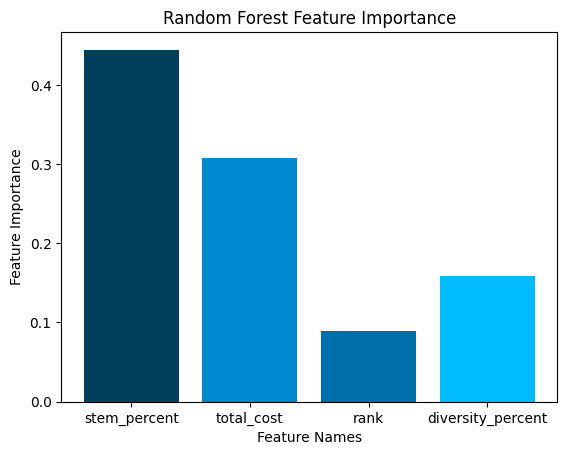

Forest Accuracy for Tree 1: 0.92


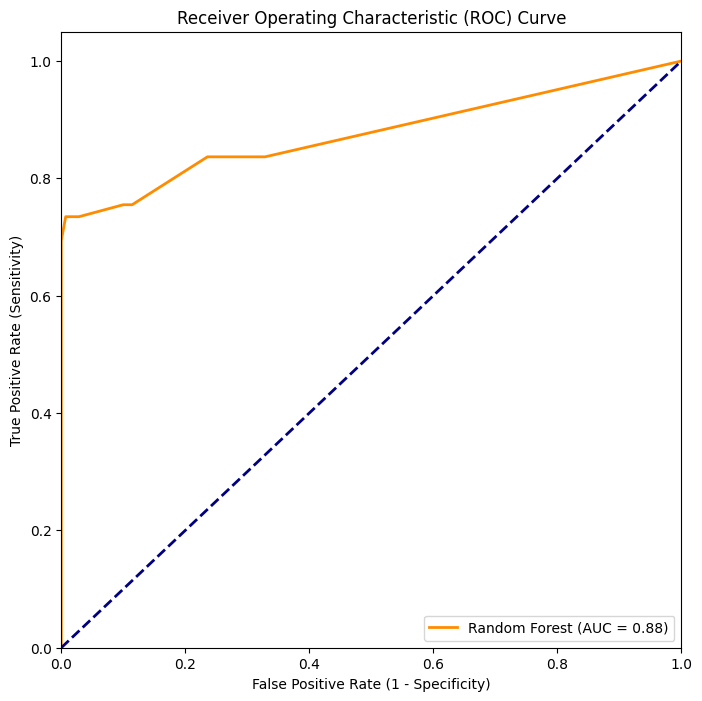

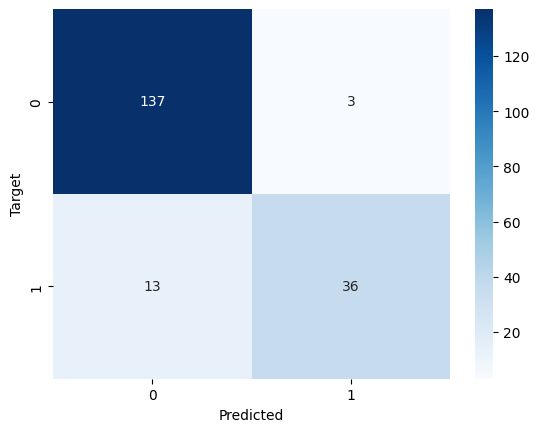

   stem_percent  total_cost  rank  diversity_percent
0          11.0    235224.0  17.0           0.225472
1          14.0     47608.0  11.0           0.425682
2           6.0     53732.0  16.0           0.135479
3          11.0     74364.0   4.0           0.340725
4          43.0    281304.0   1.0           0.322187
(382, 4)
   makes_six_figures
0                  0
1                  0
2                  0
3                  0
4                  1
(382, 1)
   stem_percent  total_cost  rank  diversity_percent
0          11.0    217800.0   3.0           0.131061
1          11.0    156200.0   6.0           0.224302
2           2.0    117760.0  21.0           0.501949
3          12.0     72192.0   4.0           0.141054
4          25.0    237172.0   2.0           0.195716
(189, 4)
   makes_six_figures
0                  0
1                  0
2                  0
3                  0
4                  0
(189, 1)
--------------------Tree 2--------------------
Feature Importance:  [0.25097

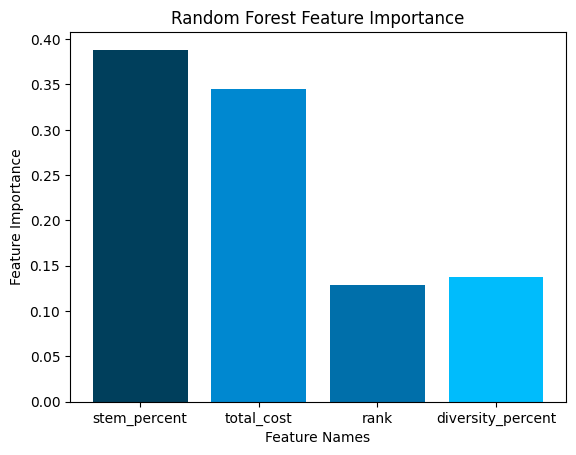

Forest Accuracy for Tree 2: 0.92


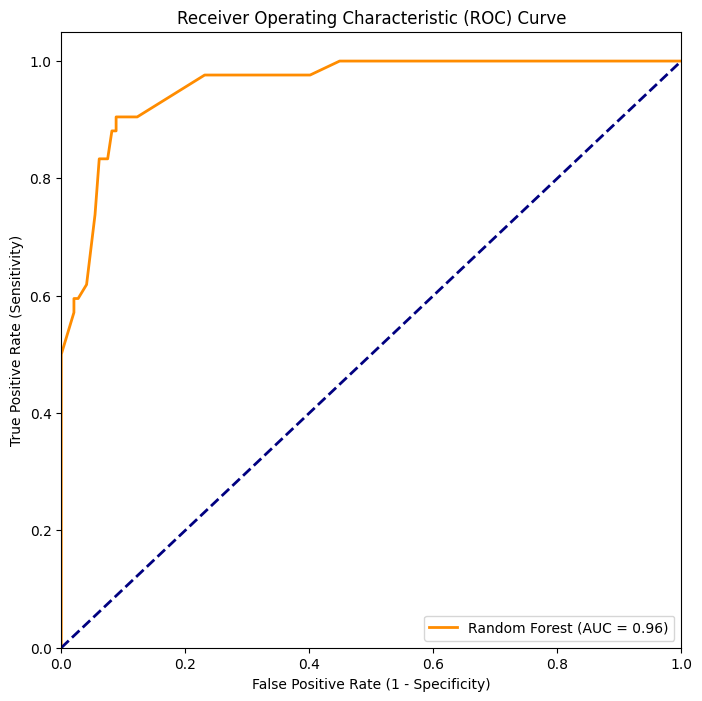

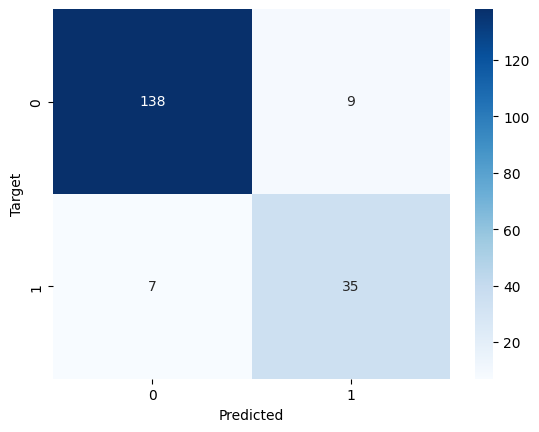

   stem_percent  total_cost  rank  diversity_percent
0           8.0    118480.0  21.0           0.142549
1           6.0     91412.0  16.0           0.182734
2          10.0     76704.0   1.0           0.211115
3           8.0     90096.0  17.0           0.157808
4          32.0    284664.0  10.0           0.434710
(382, 4)
   makes_six_figures
0                  0
1                  0
2                  1
3                  0
4                  1
(382, 1)
   stem_percent  total_cost  rank  diversity_percent
0           4.0    102824.0   5.0           0.071984
1          22.0    122952.0   2.0           0.113099
2           8.0    196992.0  12.0           0.151853
3          40.0     75416.0   1.0           0.152260
4           7.0     80672.0  14.0           0.237933
(189, 4)
   makes_six_figures
0                  0
1                  0
2                  0
3                  1
4                  0
(189, 1)
--------------------Tree 3--------------------
Feature Importance:  [0.44227

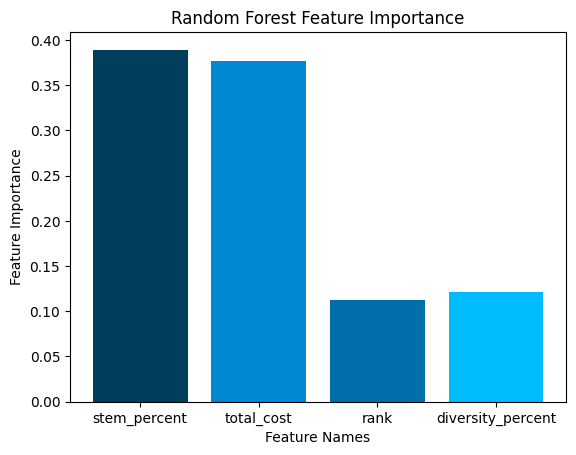

Forest Accuracy for Tree 3: 0.92


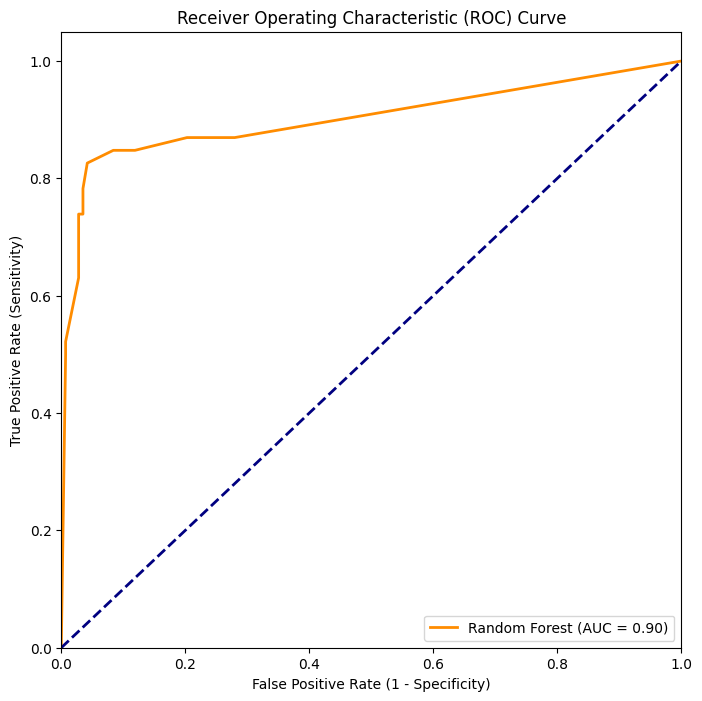

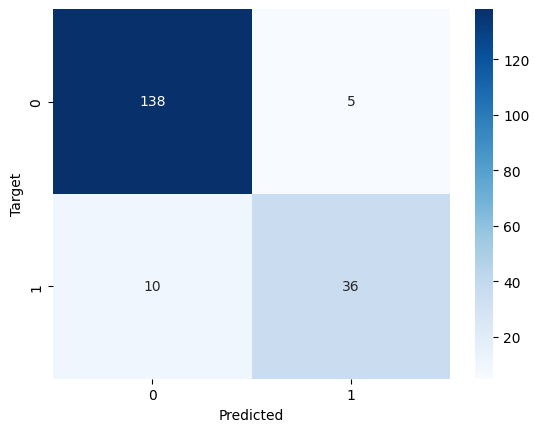

   stem_percent  total_cost  rank  diversity_percent
0          25.0    181464.0   3.0           0.102778
1          22.0     75596.0   5.0           0.337754
2           5.0     74876.0  23.0           0.156310
3           5.0    135992.0  14.0           0.212970
4          16.0     81756.0   3.0           0.144978
(382, 4)
   makes_six_figures
0                  0
1                  0
2                  0
3                  0
4                  0
(382, 1)
   stem_percent  total_cost  rank  diversity_percent
0           5.0     51460.0   6.0           0.267321
1          14.0     87888.0  24.0           0.149148
2          20.0    112796.0  17.0           0.935833
3          31.0    208480.0   8.0           0.178833
4           2.0    181040.0  18.0           0.494839
(189, 4)
   makes_six_figures
0                  0
1                  0
2                  0
3                  0
4                  0
(189, 1)
--------------------Tree 4--------------------
Feature Importance:  [0.39138

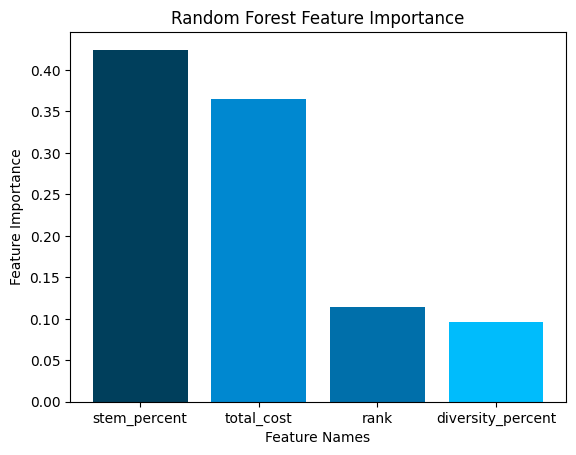

Forest Accuracy for Tree 4: 0.90


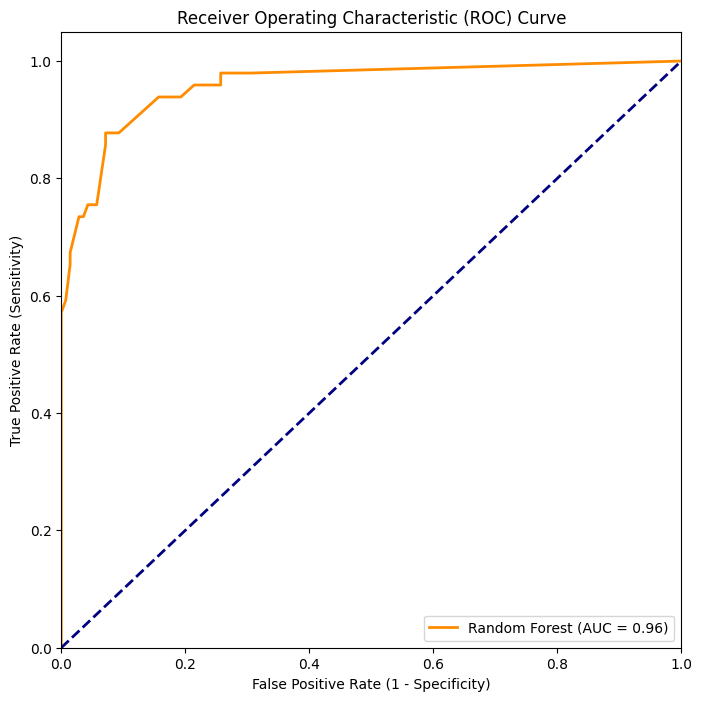

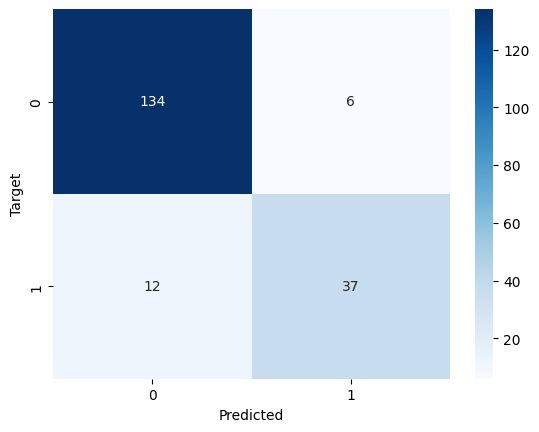

   stem_percent  total_cost  rank  diversity_percent
0          11.0     67176.0  11.0           0.277489
1          18.0    177280.0  14.0           0.135166
2          97.0    271548.0   3.0           0.386148
3           2.0    117760.0  21.0           0.501949
4           8.0     55608.0  25.0           0.165479
(382, 4)
   makes_six_figures
0                  0
1                  0
2                  1
3                  0
4                  0
(382, 1)
   stem_percent  total_cost  rank  diversity_percent
0          45.0    245400.0   1.0           0.365655
1          20.0    257440.0  17.0           0.136475
2          16.0     78132.0  12.0           0.268198
3          28.0    275204.0   2.0           0.210198
4          13.0    241576.0  21.0           0.259365
(189, 4)
   makes_six_figures
0                  1
1                  1
2                  0
3                  1
4                  1
(189, 1)
--------------------Tree 5--------------------
Feature Importance:  [0.25822

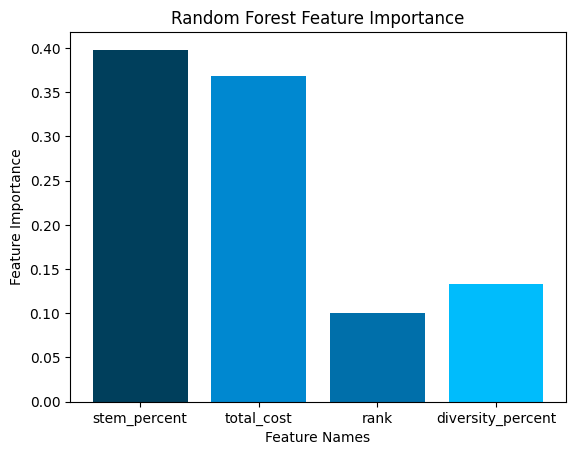

Forest Accuracy for Tree 5: 0.94


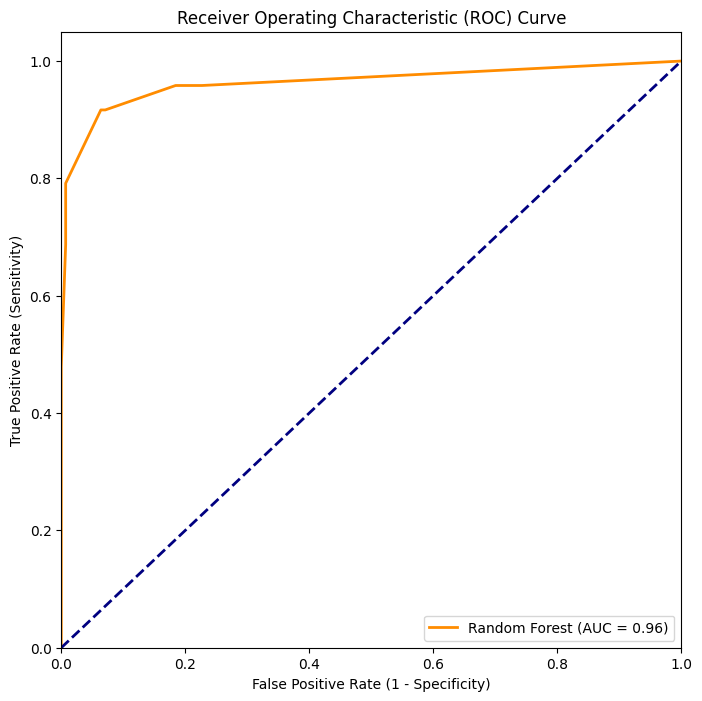

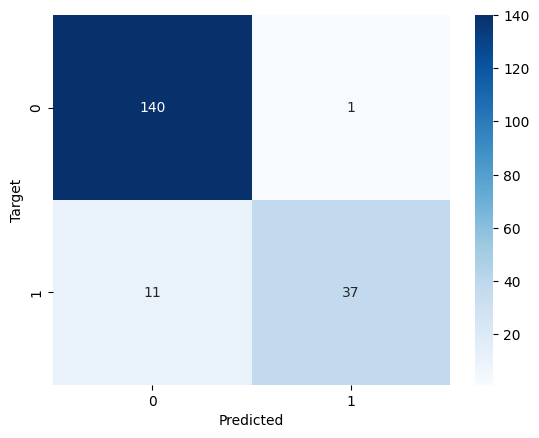

   stem_percent  total_cost  rank  diversity_percent
0          19.0    289028.0  19.0           0.371551
1          14.0     87888.0  24.0           0.149148
2           5.0     74876.0  23.0           0.156310
3          10.0    188780.0  11.0           0.529954
4          29.0     66004.0   4.0           0.328838
(382, 4)
   makes_six_figures
0                  1
1                  0
2                  0
3                  0
4                  1
(382, 1)
   stem_percent  total_cost  rank  diversity_percent
0          14.0     99664.0  17.0           0.215245
1          13.0    149984.0  10.0           0.207078
2           6.0     95564.0  15.0           0.312164
3          31.0    186840.0  13.0           0.424774
4          14.0     47608.0  11.0           0.425682
(189, 4)
   makes_six_figures
0                  0
1                  0
2                  0
3                  0
4                  0
(189, 1)


In [95]:
file_path = 'data_processed/modelling_data.csv'
trained_decision_trees, trained_random_forest = bootstrapTesting(file_path)